### IMPORT LIBRARIES / DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

### VISUALIZE DATA

[7]


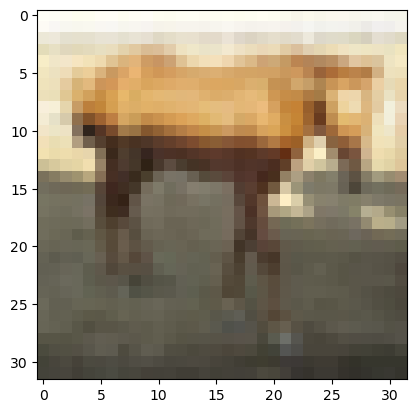

In [7]:
plt.imshow(x_train[2000])
print(y_train[2000])

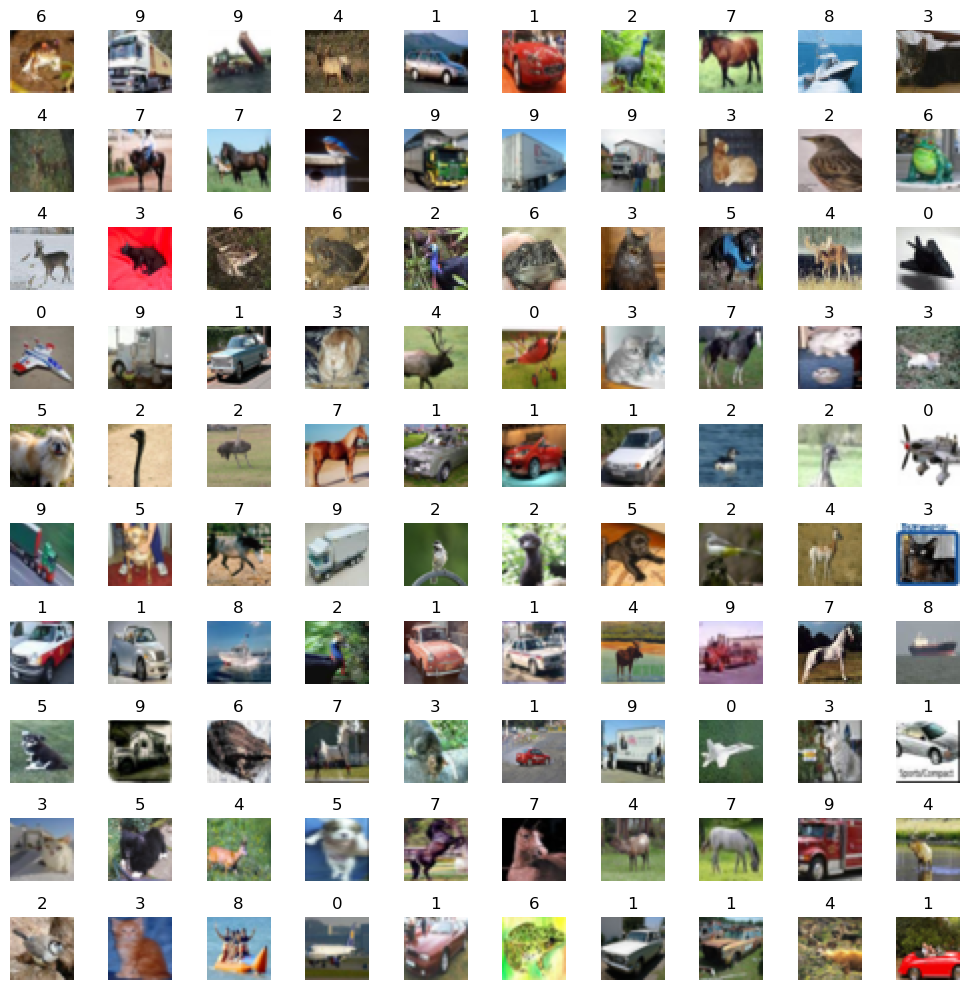

In [8]:

rows = 10
cols = 10

plt.figure(figsize=(10, 10))

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(y_train[i][0])
plt.tight_layout()

plt.show()


### DATA PREPARATION

In [9]:
X_train=x_train.astype("float32")/255
X_test=x_test.astype("float32")/255

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
import keras
y_train=keras.utils.to_categorical(y_train,num_classes=10)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
y_test=keras.utils.to_categorical(y_test,num_classes=10)

### MODEL TRAINING

In [14]:
import tensorflow as tf

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout((0.3)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

C:\Users\FREDDY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history=model.fit(X_train, y_train, epochs=2, batch_size=32, shuffle=True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.3130 - loss: 1.8238
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5564 - loss: 1.2338


### MODEL EVALUATION

In [18]:
evaluation=model.evaluate(X_test,y_test)
print("Test Accuracy:{}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6408 - loss: 1.0133
Test Accuracy:0.6349999904632568


In [19]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
print(predicted_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[3 8 8 ... 5 4 7]


In [20]:
y_test=y_test.argmax(1)

In [21]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


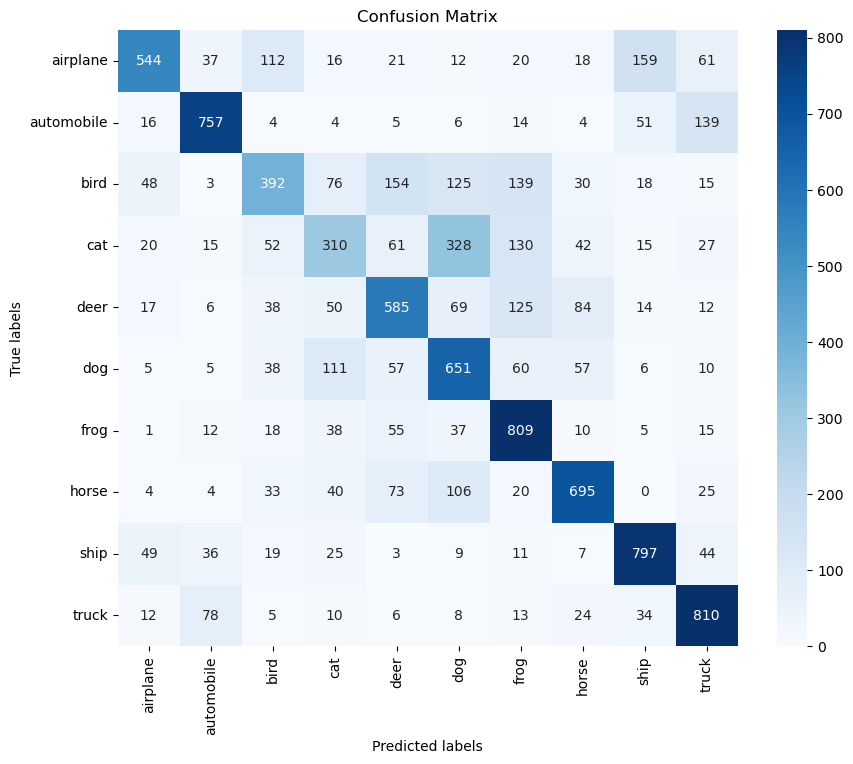

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predicted_classes = np.argmax(model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### DATA AUGMENTATION FOR THE CIFAR-10 DATASET¶

In [24]:
import numpy as np
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [25]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert pixel values to floats and normalize to range [0, 1]
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

y_train=keras.utils.to_categorical(y_train,num_classes=10)
y_test=keras.utils.to_categorical(y_test,num_classes=10)

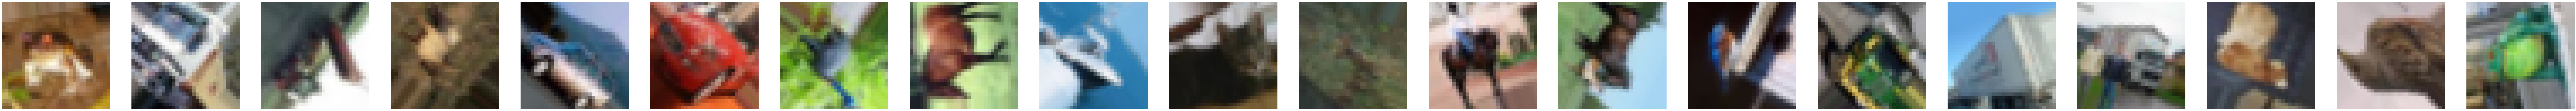

In [29]:

datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
)


datagen.fit(X_train)


num_examples = 20
fig, ax = plt.subplots(1, num_examples, figsize=(200, 10))
for i in range(num_examples):
    augmented_img = next(datagen.flow(np.expand_dims(X_train[i], axis=0), batch_size=1))[0]
    ax[i].imshow(augmented_img.squeeze())
    ax[i].axis('off')
plt.show()


In [34]:
Input_shape = X_train.shape[1:]
Input_shape 

(32, 32, 3)

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout((0.3)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=700, activation='relu'),
    tf.keras.layers.Dense(units=700, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history=model.fit(X_train, y_train, epochs=50, batch_size=64,validation_data=(X_test, y_test), shuffle=True)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 167ms/step - accuracy: 0.3145 - loss: 1.8281 - val_accuracy: 0.5851 - val_loss: 1.1596
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 233ms/step - accuracy: 0.5929 - loss: 1.1354 - val_accuracy: 0.6671 - val_loss: 0.9511
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 227s 290ms/step - accuracy: 0.6780 - loss: 0.9260 - val_accuracy: 0.7079 - val_loss: 0.8261
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 276ms/step - accuracy: 0.7289 - loss: 0.7729 - val_accuracy: 0.7404 - val_loss: 0.7447
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 798s 1s/step - accuracy: 0.7596 - loss: 0.6765 - val_accuracy: 0.7363 - val_loss: 0.7570
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 230s 294ms/step - accuracy: 0.7856 - loss: 0.6059 - val_accuracy: 0.7511 - val_loss: 0.7295
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 237s 303ms/step - accuracy: 0.8116 - loss: 0.5380 - val_accuracy: 0.7653 - val_loss: 0.7090
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 219s 280ms/step - accuracy: 0.8299 - lo

### MODEL EVALUATION

In [58]:
test_accuracy = evaluation[1]
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 76.59%


In [57]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
print(predicted_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step
[8 8 1 ... 5 1 7]


In [59]:
y_test=y_test.argmax(1)

AxisError: axis 1 is out of bounds for array of dimension 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


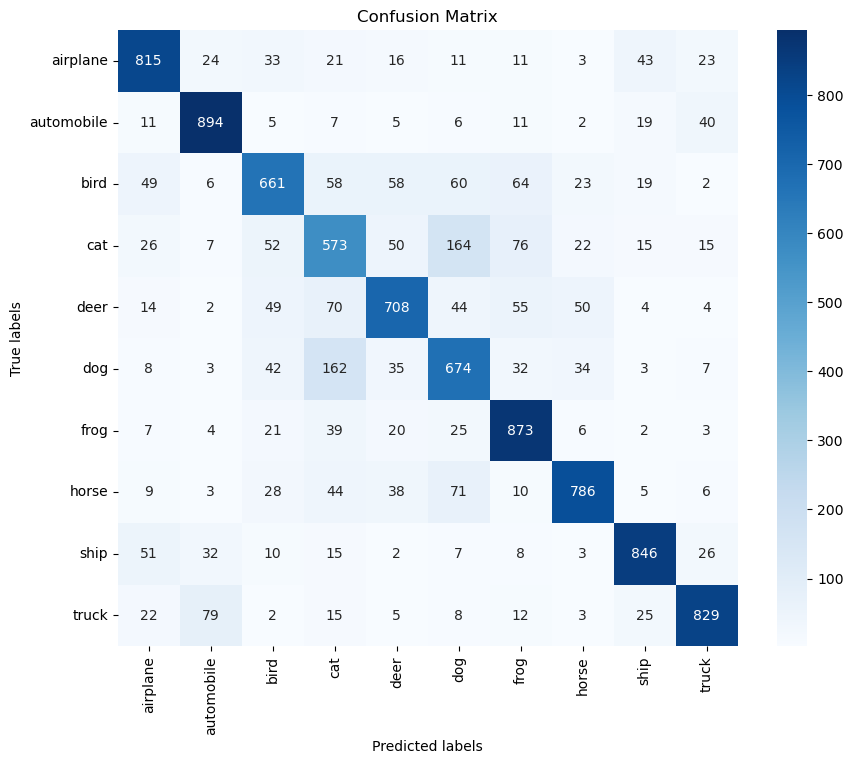

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predicted_classes = np.argmax(model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# SAVING MODEL
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
model.save(model_path)

In [46]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to load the saved model
def load_saved_model(model_path):
    if not os.path.exists(model_path):
        print("Error: Model file not found.")
        return None
    model = load_model(model_path)
    return model

# Function to preprocess input image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(32, 32))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions
def make_prediction(model, image_path):
    if model is None:
        print("Error: Model not loaded.")
        return None
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

In [47]:
model_path = "saved_models/keras_cifar10_trained_model_Augmentation.h5"  # Update with the actual path

model = load_saved_model(model_path)


In [50]:

if model is not None:
    image_path = r"C:\Users\FREDDY\Downloads\CAT.jpeg"  # Update with the path to your image
    
    predicted_class = make_prediction(model, image_path)
    if predicted_class is not None:
        print(f"Predicted class index: {predicted_class}")
    else:
        print("Failed to make prediction.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted class index: 3
